In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
plt.ion()

num_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_test_inf, y_test_inf = x_test.copy(), y_test.copy()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [2]:
id2class = {0: "Zero",
            1: "One",
            2: "Two",
            3: "Three",
            4: "Four",
            5: "Five",
            6: "Six",
            7: "Seven",
            8: "eight",
            9: "Nine"}

In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

In [4]:
batch_size = 64
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
844/844 [==============================] - 7s 4ms/step - loss: 0.2646 - accuracy: 0.9206 - val_loss: 0.0663 - val_accuracy: 0.9817
Epoch 2/15
844/844 [==============================] - 3s 4ms/step - loss: 0.0921 - accuracy: 0.9716 - val_loss: 0.0483 - val_accuracy: 0.9870
Epoch 3/15
844/844 [==============================] - 3s 4ms/step - loss: 0.0716 - accuracy: 0.9768 - val_loss: 0.0423 - val_accuracy: 0.9890
Epoch 4/15
844/844 [==============================] - 3s 4ms/step - loss: 0.0600 - accuracy: 0.9815 - val_loss: 0.0381 - val_accuracy: 0.9908
Epoch 5/15
844/844 [==============================] - 4s 5ms/step - loss: 0.0532 - accuracy: 0.9824 - val_loss: 0.0373 - val_accuracy: 0.9885
Epoch 6/15
844/844 [==============================] - 3s 4ms/step - loss: 0.0470 - accuracy: 0.9855 - val_loss: 0.0344 - val_accuracy: 0.9902
Epoch 7/15
844/844 [==============================] - 3s 4ms/step - loss: 0.0432 - accuracy: 0.9864 - val_loss: 0.0351 - val_accuracy: 0.9900
Epoch 

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
# model.save("d_mnist")

Test loss: 0.02806621789932251
Test accuracy: 0.9923999905586243


In [6]:
# serialize model to JSON
model_json = model.to_json()
with open("Models/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("Models/model.h5")
print("Saved model to disk")

Saved model to disk


Text(0.5, 1.0, 'Two')

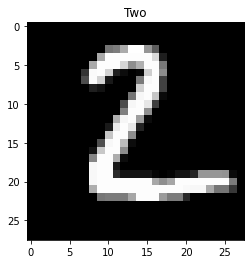

In [7]:
idx = 1
im = x_test_inf[idx]
plt.imshow(im, cmap="gray")
plt.title(id2class[y_test_inf[idx]])

In [ ]:
import requests
import json
import time
# start_time = time.time()

print(type(x_test_inf[idx]))
im = x_test_inf[idx].tolist()
data = {'image': im}
URL = 'http://127.0.0.1:5000/predict'
start_time = time.time()

result = requests.post(URL, json.dumps(data))
print(f"Prediction = {result.text}")
end_time = time.time()
print(f"Time taken = {end_time - start_time}")


In [ ]:
from PIL import Image
image = Image.open('one.png')
iamge = image.resize((28, 28))
# image = image.tolist()

newsize = (28, 28)
image = image.resize(newsize)
image = np.asarray(image)
image = image.tolist()

data = {'image': image}
URL = 'http://127.0.0.1:5000/predict'

result = requests.post(URL, json.dumps(data))
print(f"Prediction = {result.text}")